In [1]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

train shape (60000, 28, 28) (60000,)
test shape (10000, 28, 28) (10000,)


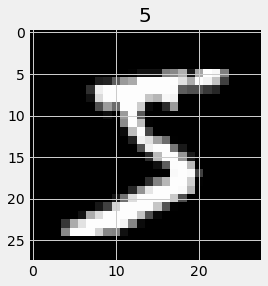

In [12]:
import tensorflow.keras.datasets as datasets
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
print("train shape", x_train.shape, y_train.shape)
print("test shape", x_test.shape, y_test.shape)
plt.imshow(x_train[0], cmap='gray')
plt.title(y_train[0])
plt.show()

In [16]:
db = tf.data.Dataset.from_tensor_slices(x_train)
print(next(iter(db)).shape)

db = tf.data.Dataset.from_tensor_slices((x_train, y_train))
print(next(iter(db))[0].shape)
print(next(iter(db))[1])

(28, 28)
(28, 28)
tf.Tensor(5, shape=(), dtype=uint8)


In [20]:
db = tf.data.Dataset.from_tensor_slices((x_train, y_train))
db.shuffle(10000)

<ShuffleDataset shapes: ((28, 28), ()), types: (tf.uint8, tf.uint8)>

In [26]:
def preprocess(x, y):
    x = tf.cast(x, dtype=tf.float32) / 255.
    y = tf.one_hot(tf.cast(y, dtype=tf.int32), depth=10)
    return x, y
db = tf.data.Dataset.from_tensor_slices((x_train, y_train))
db = db.map(preprocess)

sample = next(iter(db))
print(sample[0].shape, sample[1].shape)
print(sample[1][:])

(28, 28) (10,)
tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


In [28]:
db = tf.data.Dataset.from_tensor_slices((x_train, y_train))
db = db.batch(32)
sample = next(iter(db))
print(sample[0].shape, sample[1].shape)

(32, 28, 28) (32,)


In [29]:
db = tf.data.Dataset.from_tensor_slices((x_train, y_train))
db = db.repeat(3)

epoch = 0
step = 0
for (x, y) in db:
    step += 1
    if step % x_train.shape[0] == 0:
        epoch += 1
        step = 0
print(epoch)

3


In [32]:
def preprocess(x, y):
    x = tf.cast(x, dtype=tf.float32)
    y = tf.one_hot(tf.cast(y, tf.int64), depth=10)
    return x, y

def mnist_dataset():
    (x_train, y_train), (x_valid, y_valid) = datasets.fashion_mnist.load_data()
    ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    ds = ds.map(preprocess)
    ds = ds.shuffle(60000).batch(32)
    
    ds_valid = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
    ds_valid = ds_valid.map(preprocess)
    ds_valid = ds_valid.shuffle(10000).batch(32)
    return ds, ds_valid

ds_train, ds_valid = mnist_dataset()

4423680/4422102 [==============================] - 130s 29us/step
